In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math,copy

In [2]:
# dataSet for X = pressure (lb/sq in) of liquid nitrogen VS Y = weight in pounds of liquid nitrogen passing through flow meter each second
# source : https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html

x_train = np.array([ 114.8,90.5 ,73.8 ,115.8,99.4 ,93   ,73.9 ,65.7 ,66.2 ,77.9 ,109.8,105.4,88.6 ,89.6 ,73.8 ,101.3,120  ,75.9 ,76.2  ,81.9,84.3,98 ])
y_train = np.array([ 531.7,507.1,496.4,505.2,506.4,510.2,503.9,506.2,506.3,510.2,508.6,510.9,505.4,512.8,502.8,493  ,510.8,512.8,513.4,510,504.3,522 ])

print(x_train.size, y_train.size)
m = x_train.size    # 'm' is the total no of data in the set

22 22


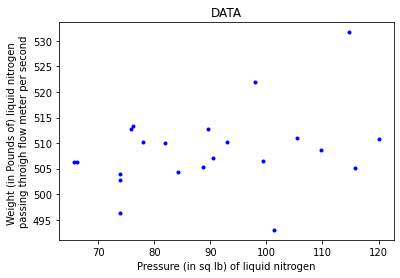

In [3]:
plt.scatter(x_train,y_train,marker='.',c='b')
plt.xlabel("Pressure (in sq lb) of liquid nitrogen")
plt.ylabel("Weight (in Pounds of) liquid nitrogen \npassing throigh flow meter per second")
plt.title("DATA")
plt.show()

In [4]:
def compute_cost(x,y,w,b):
    cost=0
    m=x.size
    for i in range(0,m):
        f=w*x[i]+b
        cost=cost+((f-y[i])**2)
    cost=cost/(2*m)
    return cost

In [5]:
def compute_gradient(x,y,w,b):
    d_wrt_w=0
    d_wrt_b=0
    m=x.size
    for i in range(0,m):
        f= w*x[i] + b
        d_wrt_w = d_wrt_w + x[i]*(f-y[i])
        d_wrt_b = d_wrt_b + (f-y[i])
    d_wrt_b=d_wrt_b/m
    d_wrt_w=d_wrt_w/m
    return d_wrt_w,d_wrt_b

In [6]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iters,calculate_cost,calculate_gradient):
    J_history=[]
    p_history=[]
    w=w_in
    b=b_in
    for i in range(0,num_iters):
        dj_dw,dj_db=calculate_gradient(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        J_history.append(calculate_cost(x,y,w,b))
        p_history.append([w,b])
    return w,b,J_history,p_history
    

In [11]:
# w=1.826952
# b=346.013677
w=0
b=0
iterations=500000
alpha=0.00023
w_final,b_final,J_hist,p_hist=gradient_descent(x_train,y_train,w,b,alpha,iterations,compute_cost,compute_gradient)
print(f"The final value of (w,b) found by gradient descent is:({w_final},{b_final})")

The final value of (w,b) found by gradient descent is:(0.30158763824918844,481.13451804159695)


Cost at 0 th iteration: 387.07825883908396
Cost at 40000 th iteration: 221.42897488439164
Cost at 80000 th iteration: 136.7253229533292
Cost at 120000 th iteration: 88.83237888215037
Cost at 160000 th iteration: 61.7528605908824
Cost at 200000 th iteration: 46.44162163681988
Cost at 240000 th iteration: 37.78437612060356
Cost at 280000 th iteration: 32.88941627098263
Cost at 320000 th iteration: 30.121719330369718
Cost at 360000 th iteration: 28.556814491430035
Cost at 400000 th iteration: 27.671989596405794


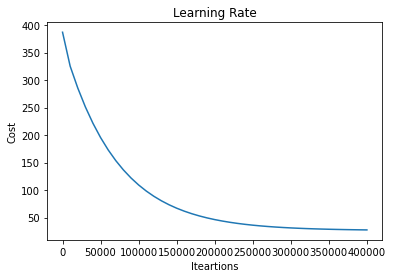

In [8]:
for i in range(0,iterations):
    if (i%40000 == 0):
        print("Cost at",i,"th iteration:", J_hist[i])

i=list(range(0,iterations))
plt.title("Learning Rate")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.plot(i[::10000],J_hist[::10000])
plt.show()

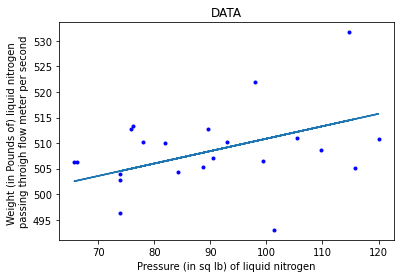

In [10]:
plt.scatter(x_train,y_train,marker='.',c='b')
y_hat=w_final*x_train+b_final
plt.plot(x_train,y_hat)
plt.xlabel("Pressure (in sq lb) of liquid nitrogen")
plt.ylabel("Weight (in Pounds of) liquid nitrogen \npassing throigh flow meter per second")
plt.title("DATA")
plt.show()